# Implement a Softmax Classifier Using Keras 

## Load and Process the MNIST Dataset

1. Load data

In [1]:
from keras.datasets import mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_test: ' + str(y_test.shape))

Using TensorFlow backend.


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


2. Convert the 28x28 images to 784-dim vectors 

In [2]:
x_train_vec = x_train.reshape(60000,784)
x_test_vec = x_test.reshape(10000,784)

print('Shape of x_train_vec is ' + str(x_train_vec.shape))
print('Shape of x_test_vec is ' + str(x_test_vec.shape))

Shape of x_train_vec is (60000, 784)
Shape of x_test_vec is (10000, 784)


3. One-hot encode: convert the labels to 10-dim vectors

In [3]:
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec is ' + str(y_train_vec.shape))
print('Shape of y_test_vec is ' + str(y_test_vec.shape))

Shape of y_train_vec is (60000, 10)
Shape of y_test_vec is (10000, 10)


4. Partition the training set to training and validation sets

In [4]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices, : ]
y_valid_vec = y_train_vec[valid_indices, : ]

x_train_vec = x_train_vec[train_indices, : ]
y_train_vec = y_train_vec[train_indices, : ]

print('Shape of x_valid_vec: ' + str(x_valid_vec.shape))
print('Shape of y_valid_vec: ' + str(y_valid_vec.shape))
print('Shape of x_train_vec: ' + str(x_train_vec.shape))
print('Shape of y_train_vec: ' + str(y_train_vec.shape))

Shape of x_valid_vec: (10000, 784)
Shape of y_valid_vec: (10000, 10)
Shape of x_train_vec: (50000, 784)
Shape of y_train_vec: (50000, 10)


## Build the Softmax Classifier

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Train the Softmax Classifier

In [6]:
from keras import optimizers

# optimization algorithm, learning rate, loss function, metric
model.compile(optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# batch size and number of epochs
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, validation_data=(x_valid_vec, y_valid_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 31us/step - loss: 12.0947 - acc: 0.2383 - val_loss: 10.2375 - val_acc: 0.3550
Epoch 2/50
50000/50000 [==============================] - 1s 21us/step - loss: 9.5582 - acc: 0.3995 - val_loss: 8.9947 - val_acc: 0.4341
Epoch 3/50
50000/50000 [==============================] - 1s 21us/step - loss: 8.7002 - acc: 0.4522 - val_loss: 8.0774 - val_acc: 0.4909
Epoch 4/50
50000/50000 [==============================] - 1s 21us/step - loss: 7.9065 - acc: 0.5021 - val_loss: 7.5569 - val_acc: 0.5241
Epoch 5/50
50000/50000 [==============================] - 1s 21us/step - loss: 7.5846 - acc: 0.5228 - val_loss: 7.3183 - val_acc: 0.5405
Epoch 6/50
50000/50000 [==============================] - 1s 21us/step - loss: 7.3962 - acc: 0.5357 - val_loss: 7.1553 - val_acc: 0.5502
Epoch 7/50
50000/50000 [==============================] - 1s 22us/step - loss: 7.2506 - acc: 0.5444 - val_loss: 6.9546 - val_a

## Examine the Results

1. Plot the accuracy against epochs

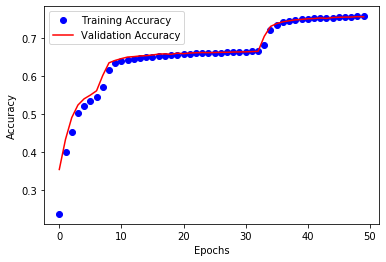

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2. Evaluate the model on the test set. 

In [8]:
loss_and_acc = model.evaluate(x_test_vec, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 0s 24us/step
loss = 3.963617168426514
accuracy = 0.7505
